In [25]:
import numpy as np
from sklearn.svm import SVR
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
df = pd.read_csv("merge_oil.csv")

In [17]:
def conv_to_float(n):
    if type(n)==int or type(n)==float:
        return float(n)
    l = n.split('.')
    if(len(l)==1):
        return float(l[0])
    m = l[1]+"."+l[-2]
    return float(m)

In [18]:
ongc_open = [conv_to_float(i) for i in list(df["ONGC_Open"])]

high = [conv_to_float(i) for i in list(df["ONGC_High"])]

low = [conv_to_float(i) for i in list(df["ONGC_Low"])]

ongc_close = [conv_to_float(i) for i in list(df["ONGC_Close"])]

In [19]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)

In [20]:
ytrain = ongc_close[0:round(0.8*len(ongc_close))]
ytest = np.asarray(ongc_close[len(ytrain):])

ytrain = np.asarray(ytrain)

In [26]:
xtrain = ongc_open[0:round(0.8*len(ongc_open))]
xtest = np.asarray(ongc_open[len(xtrain):])
date = df["Date"][len(xtrain):]

xtrain = np.asarray(xtrain).reshape(-1,1)
xtest = xtest.reshape(-1,1)

xtrain = np.asarray(xtrain).reshape(-1,1)
xtest = xtest.reshape(-1,1)
open_sr = svr_rbf.fit(xtrain,ytrain)
open_y_rbf  = open_sr.predict(xtest)
open_y_trbf = open_sr.predict(xtrain)
open_sl = svr_lin.fit(xtrain, ytrain)
open_y_lin  = open_sl.predict(xtest)
open_y_tlin = open_sl.predict(xtrain)

In [27]:

open_y_rbf = open_y_rbf.tolist()
for i in range(len(open_y_rbf)):
    open_y_rbf[i] = float(format(open_y_rbf[i], '.2f'))

open_y_trbf = open_y_trbf.tolist()
for i in range(len(open_y_trbf)):
    open_y_trbf[i] = float(format(open_y_trbf[i], '.2f'))

open_y_lin = open_y_lin.tolist()
for i in range(len(open_y_lin)):
    open_y_lin[i] = float(format(open_y_lin[i], '.2f'))

open_y_tlin = open_y_tlin.tolist()
for i in range(len(open_y_tlin)):
    open_y_tlin[i] = float(format(open_y_tlin[i], '.2f'))
print("Linear :",sqrt(mean_squared_error(ytest,open_y_lin)))
print("RBF :",sqrt(mean_squared_error(ytest,open_y_rbf)))
    

Linear : 2.600330765119958
RBF : 2.64824212014022


In [28]:
xtrain = high[0:round(0.8*len(high))]
xtest = np.asarray(high[len(xtrain):])

xtrain = np.asarray(xtrain).reshape(-1,1)
xtest = xtest.reshape(-1,1)

high_sr = svr_rbf.fit(xtrain,ytrain)
high_y_rbf  = high_sr.predict(xtest)
high_y_trbf = high_sr.predict(xtrain)
high_sl = svr_lin.fit(xtrain, ytrain)
high_y_lin  = high_sl.predict(xtest)
high_y_tlin = high_sl.predict(xtrain)

In [29]:
high_y_rbf = high_y_rbf.tolist()
for i in range(len(high_y_rbf)):
    high_y_rbf[i] = float(format(high_y_rbf[i], '.2f'))

high_y_trbf = high_y_trbf.tolist()
for i in range(len(high_y_trbf)):
    high_y_trbf[i] = float(format(high_y_trbf[i], '.2f'))

high_y_lin = high_y_lin.tolist()
for i in range(len(high_y_lin)):
    high_y_lin[i] = float(format(high_y_lin[i], '.2f'))

high_y_tlin = high_y_tlin.tolist()
for i in range(len(high_y_tlin)):
    high_y_tlin[i] = float(format(high_y_tlin[i], '.2f'))
print("Linear :",sqrt(mean_squared_error(ytest,high_y_lin)))
print("RBF :",sqrt(mean_squared_error(ytest,high_y_rbf)))   

Linear : 4.230301477417014
RBF : 1.6212146178856797


In [30]:
xtrain = low[0:round(0.8*len(low))]
xtest = np.asarray(low[len(xtrain):])

xtrain = np.asarray(xtrain).reshape(-1,1)
xtest = xtest.reshape(-1,1)

low_sr = svr_rbf.fit(xtrain,ytrain)
low_y_rbf  = low_sr.predict(xtest)
low_y_trbf = low_sr.predict(xtrain)
low_sl = svr_lin.fit(xtrain, ytrain)
low_y_lin  = low_sl.predict(xtest)
low_y_tlin = low_sl.predict(xtrain)

In [31]:
low_y_rbf = low_y_rbf.tolist()
for i in range(len(low_y_rbf)):
    low_y_rbf[i] = float(format(low_y_rbf[i], '.2f'))

low_y_trbf = low_y_trbf.tolist()
for i in range(len(low_y_trbf)):
    low_y_trbf[i] = float(format(low_y_trbf[i], '.2f'))

low_y_lin = low_y_lin.tolist()
for i in range(len(low_y_lin)):
    low_y_lin[i] = float(format(low_y_lin[i], '.2f'))

low_y_tlin = low_y_tlin.tolist()
for i in range(len(low_y_tlin)):
    low_y_tlin[i] = float(format(low_y_tlin[i], '.2f'))

print("Linear :",sqrt(mean_squared_error(ytest,low_y_lin)))
print("RBF :",sqrt(mean_squared_error(ytest,low_y_rbf)))

Linear : 2.3393221020470287
RBF : 1.778743104826861


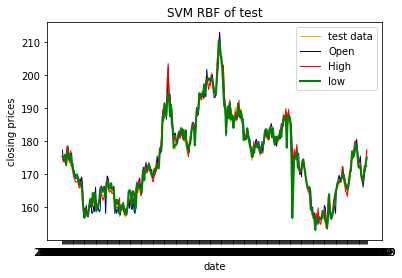

In [13]:
lw=2
plt.plot(date, ytest, color='orange',lw=1,label='test data')
plt.plot(date, open_y_rbf, color='navy', lw=1, label='Open')
plt.plot(date, high_y_rbf, color='red', lw=1, label='High')
plt.plot(date, low_y_rbf, color='green', lw=lw, label='low')
plt.xlabel('date')
plt.ylabel('closing prices')
plt.title('SVM RBF of test')
plt.legend()
plt.show()

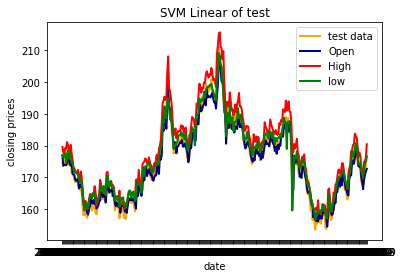

In [14]:
lw=2
plt.plot(date, ytest, color='orange',lw=lw,label='test data')
plt.plot(date, open_y_lin, color='navy', lw=lw, label='Open')
plt.plot(date, high_y_lin, color='red', lw=lw, label='High')
plt.plot(date, low_y_lin, color='green', lw=lw, label='low')
plt.xlabel('date')
plt.ylabel('closing prices')
plt.title('SVM Linear of test')
plt.legend()
plt.show()

In [12]:
f = open("ongc.txt","w")
f.write("high\n[")
for i in range(len(ytest)):
    f.write(str(high_y_rbf[i])+',')
f.write("]\n")
f.close()